# Dataset for Binary Classification 

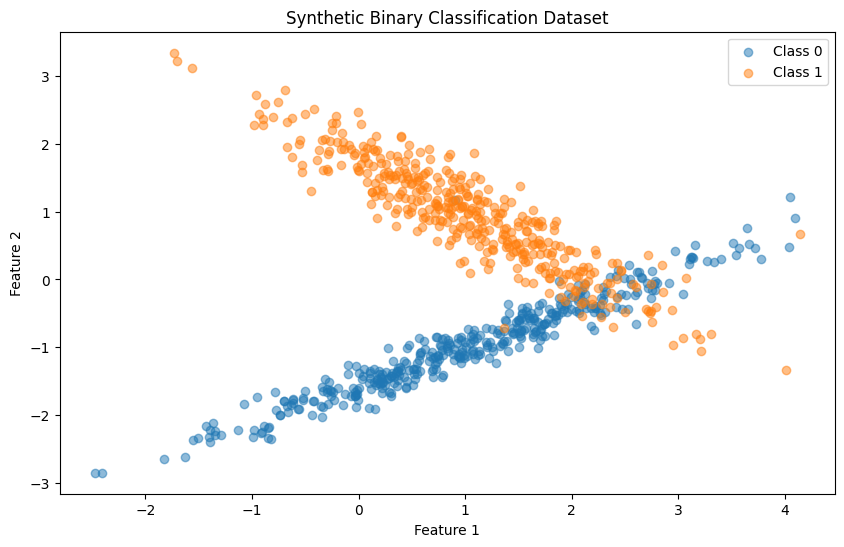

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split

# Generate a simplistic synthetic dataset with binary classes
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42, n_classes=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the synthetic dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Class 1', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Dataset')
plt.legend()
plt.show()


# Learning Curves 

In [3]:
def learning_curve(model, X, y, cv, train_sizes):
    # Train the Logistic Regression model and plot the learning curve manually
    train_scores = []
    val_scores = []

    train_scores_std = []
    val_scores_std = []

    for train_size in train_sizes:
        # Sample the training set according to the current size
        X_subset = X[:int(train_size * len(X))]
        y_subset = y[:int(train_size * len(y))]
        
        cv = StratifiedKFold(n_splits=10)
        train_score = []
        val_score = []
        
        for train_index, test_index in cv.split(X_subset, y_subset):
            X_fold, X_val_fold = X_subset[train_index], X_subset[test_index]
            y_fold, y_val_fold = y_subset[train_index], y_subset[test_index]
            
            clf.fit(X_fold, y_fold)
            
            train_score.append(clf.score(X_fold, y_fold))
            val_score.append(clf.score(X_val_fold, y_val_fold))
        
        train_scores.append(np.mean(train_score))
        val_scores.append(np.mean(val_score))
        train_scores_std.append(np.std(train_score))
        val_scores_std.append(np.std(val_score))

    train_scores = np.array(train_scores)
    val_scores = np.array(val_scores)
    train_scores_std = np.array(train_scores_std)
    val_scores_std = np.array(val_scores_std)
    
    return train_sizes, train_scores, val_scores, train_scores_std, val_scores_std

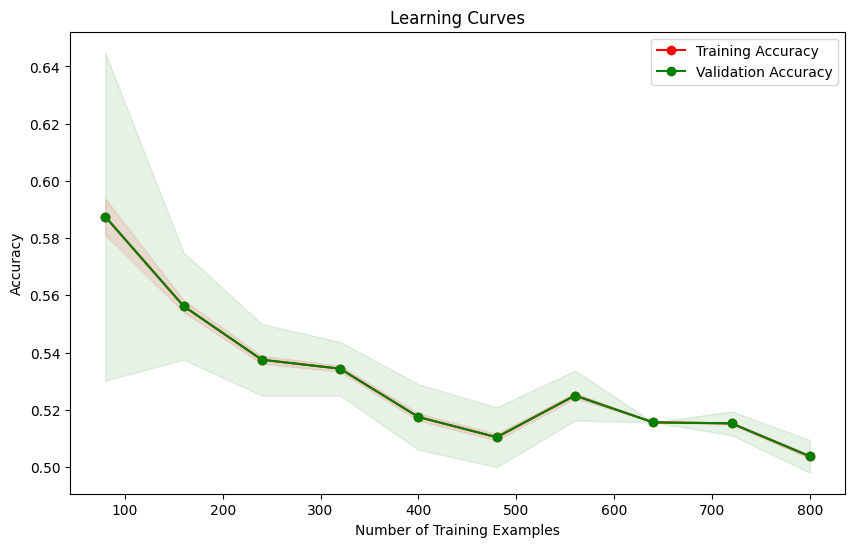

In [5]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MajorityClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.majority_class = None

    def fit(self, X, y):
        # Determine the majority class
        unique, counts = np.unique(y, return_counts=True)
        self.majority_class = unique[np.argmax(counts)]
        return self

    def predict(self, X):
        # Always predict the majority class
        return np.full(X.shape[0], self.majority_class)
    
clf = MajorityClassifier()


train_sizes, train_scores, val_scores, train_scores_std, val_scores_std = learning_curve(clf,
                                                                                        X_train,
                                                                                        y_train,
                                                                                        cv=10,
                                                                                        train_sizes=np.linspace(0.1, 1.0, 10)  # Training set sizes from 10% to 100%
                                                                                        )


# print("Training Scores:", train_scores)
# print("Validation Scores:", val_scores)

# Plotting the learning curves with standard deviations
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes * len(X_train), train_scores - train_scores_std,
                 train_scores + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes * len(X_train), val_scores - val_scores_std,
                 val_scores + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes * len(X_train), train_scores, 'o-', color="r", label='Training Accuracy')
plt.plot(train_sizes * len(X_train), val_scores, 'o-', color="g", label='Validation Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()